In [2]:
import numpy as np
import csv
import pandas
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.pyplot as pyplot
import os, sys, warnings
import os.path as path
import plotly.plotly as py
import plotly.tools as tls

data = pandas.read_csv('/Users/ujwalkumar/Desktop/Independent Research/Code Work/Alldaytest.csv') #Importing the data set



To begin our data analysis, we must first retreive as much information as possible regarding our data set. In order to do so, we use the `.shape` and `.info` functions to retreive the length of our data set and the `.head` function to retreive the first couple of lines.

In [3]:
#Finding the shape of our imported data.
data.shape

(684, 13)

In [4]:
data.head()

,#id,wm_ra (deg),ra_err (arcsec),wm_decl (deg),wm_uncertainty_ns (arcsec),datapoints,newsource.id,sigma min,sigma max,flux mean,flux max,v_int,eta_int
0,7006,151.036,1.916,3.633,1.911969,28,4881,14.787,0.256,0.114,0.203,1.176,0.344
1,7007,150.309,1.850,1.912,1.848898,30,,,,0.019,0.216,1.325,0.794
2,7008,151.039,1.709,0.992,1.708903,35,4926,28.506,0.830,0.038,0.337,0.895,1.722
3,7009,149.882,0.888,2.966,0.886442,130,,,,0.082,0.592,0.761,1.351
4,7010,151.252,1.075,1.610,1.074248,88,4877,15.867,0.275,0.039,0.137,0.680,0.742


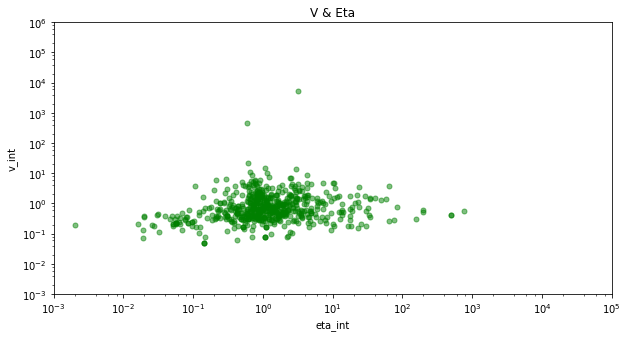

In [14]:
%matplotlib inline
pyplot.figure(figsize=(10,5))

procdir = '/Users/kumarnarasimhan/Desktop/Independent Research/Code Work/Alldaytest.csv'


#reading file, knowing where each part of the document is


with open(procdir, "r") as infile:
    read = csv.reader(infile)
    data = list(read)

size = len(data)
eta_int = np.ndarray(shape=(size,1),dtype=np.float64)
v_int = np.ndarray(shape=(size,1),dtype=np.float64)
flux_max = np.ndarray(shape=(size,1),dtype=np.float64)
flux_mean = np.ndarray(shape=(size,1))

for i in range(1,size):
    eta_int[i,0] = float(data[i][12])
    v_int[i,0] = float(data[i][11])
    flux_max[i,0] = float(data[i][10])
    flux_mean[i,0] = float(data[i][9])


pyplot.plot(eta_int,v_int, 'go', markersize=5, alpha = 0.5)
pyplot.xscale('log')
pyplot.xlim([10e-4, 10e4])
pyplot.ylim([10e-4,10e5])
pyplot.yscale('log')
pyplot.title('V & Eta')
pyplot.xlabel('eta_int')
pyplot.ylabel('v_int')

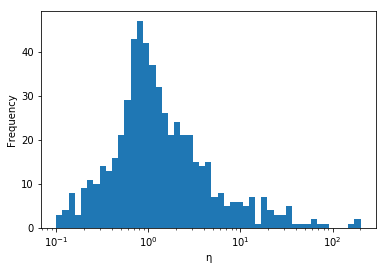

In [5]:
#plotting histograms of Eta

%matplotlib inline
pyplot.hist(eta_int,bins=np.logspace(np.log10(0.1),np.log(10),50),log=True)
# pyplot.xlim([0.1,10])
pyplot.xscale('log')
pyplot.yscale('linear')
pyplot.xlabel('η')
pyplot.ylabel('Frequency')

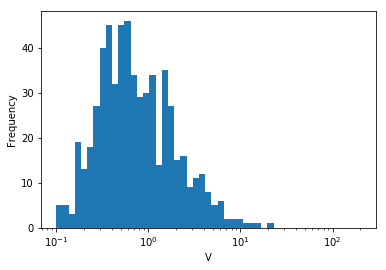

In [6]:
#plotting histograms of V

%matplotlib inline
pyplot.hist(v_int,bins=np.logspace(np.log10(0.1),np.log(10),50),log=True)
# pyplot.xlim([0.09,4])
pyplot.xscale('log')
pyplot.yscale('linear')
pyplot.xlabel('V')
pyplot.ylabel('Frequency')

In [7]:
#Max peak of Eta and V are at values under 1 showing little variability in those sources as expected
#Distribution is Gaussian in the paper which they had chosen before hand but I assume truly variable stars are little so it's skewed to the left

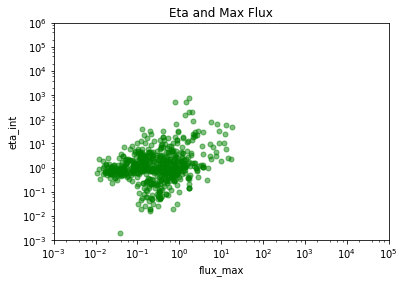

In [8]:
#plotting Eta and Max Flux

pyplot.plot(flux_max,eta_int, 'go', markersize=5, alpha = 0.5)

pyplot.xlim([10e-4, 10e4])
pyplot.ylim([10e-4,10e5])
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.title('Eta and Max Flux')
pyplot.xlabel('flux_max')
pyplot.ylabel('eta_int')

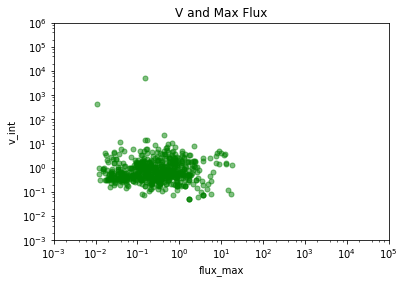

In [9]:
#plotting V and Max Flux
    
pyplot.plot(flux_max,v_int, 'go', markersize=5, alpha = 0.5)
pyplot.xlim([10e-4, 10e4])
pyplot.ylim([10e-4,10e5])
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.title('V and Max Flux')
pyplot.xlabel('flux_max')
pyplot.ylabel('v_int')

In [10]:
#Eta and max flux rises but V and max flux falls

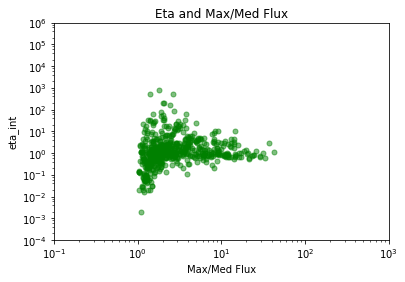

In [11]:
#plotting Eta and Max/Med Flux
with np.errstate(divide='ignore', invalid='ignore'):
    data_div=flux_max/flux_mean[:685]
pyplot.ylim([10e-5, 10e5])
pyplot.xlim([10e-2,10e2])
pyplot.plot(data_div,eta_int, 'go', markersize=5, alpha = 0.5)
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.title('Eta and Max/Med Flux')
pyplot.xlabel('Max/Med Flux')
pyplot.ylabel('eta_int')

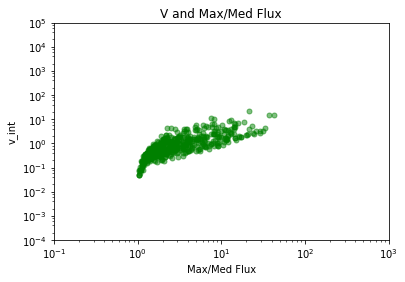

In [12]:
#plotting V and Max/Med Flux
with np.errstate(divide='ignore', invalid='ignore'):
    data_div=flux_max/flux_mean[:685]
pyplot.ylim([10e-5, 10e4])
pyplot.xlim([10e-2,10e2])
pyplot.plot(data_div,v_int, 'go', markersize=5, alpha = 0.5)
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.title('V and Max/Med Flux')
pyplot.xlabel('Max/Med Flux')
pyplot.ylabel('v_int')

In [13]:
#The greater the ration of Max/Median flux, the greater the variability and hence, the quasi-linear relationship between the two